In [1]:
import numpy as np

In [2]:
df2 = "Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."
df2

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [3]:
df2 = df2.split('.')
df = []
df2

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 ' Learning can be supervised, semi-supervised or unsupervised',
 ' Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance',
 '']

In [4]:
for ln in df2:
    df3 = ''.join([ch for ch in ln if ch.isalpha() or ch==' '])
    df.append(df3)
df

['Deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 ' Learning can be supervised semisupervised or unsupervised',
 ' Deeplearning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and Transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance',
 '']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
token = Tokenizer()
token.fit_on_texts(df)
seq = token.texts_to_sequences(df)
print(seq)
# help(Tokenizer)

[[2, 1, 11, 12, 6, 2, 13, 1, 14, 15, 7, 16, 17, 18, 7, 8, 1, 19, 20, 21, 22, 4, 3, 23, 24, 1], [1, 25, 26, 27, 28, 29, 30], [31, 32, 33, 6, 2, 4, 3, 2, 34, 3, 2, 35, 1, 36, 4, 3, 37, 4, 3, 5, 38, 9, 39, 40, 10, 41, 42, 43, 44, 45, 46, 47, 48, 49, 8, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 5, 61, 62, 63, 64, 65, 9, 66, 67, 68, 10, 5, 69, 70, 71, 72, 73, 74, 75], []]


In [7]:
a={}
b={} #index to word
for i,s in enumerate(seq):
    wordsins = df[i].split()
    # print(wordsins)
    # print(s)
    for j,st in enumerate(s):
        a[wordsins[j]] = st
        b[st] = wordsins[j]
print(a);print()
print(b)

{'Deep': 2, 'learning': 1, 'also': 11, 'known': 12, 'as': 6, 'deep': 2, 'structured': 13, 'is': 14, 'part': 15, 'of': 7, 'a': 16, 'broader': 17, 'family': 18, 'machine': 8, 'methods': 19, 'based': 20, 'on': 21, 'artificial': 22, 'neural': 4, 'networks': 3, 'with': 23, 'representation': 24, 'Learning': 1, 'can': 25, 'be': 26, 'supervised': 27, 'semisupervised': 28, 'or': 29, 'unsupervised': 30, 'Deeplearning': 31, 'architectures': 32, 'such': 33, 'belief': 34, 'reinforcement': 35, 'recurrent': 36, 'convolutional': 37, 'and': 5, 'Transformers': 38, 'have': 9, 'been': 39, 'applied': 40, 'to': 10, 'fields': 41, 'including': 42, 'computer': 43, 'vision': 44, 'speech': 45, 'recognition': 46, 'natural': 47, 'language': 48, 'processing': 49, 'translation': 50, 'bioinformatics': 51, 'drug': 52, 'design': 53, 'medical': 54, 'image': 55, 'analysis': 56, 'climate': 57, 'science': 58, 'material': 59, 'inspection': 60, 'board': 61, 'game': 62, 'programs': 63, 'where': 64, 'they': 65, 'produced': 66,

In [8]:
contexts = []
targets = []
for i in (seq):
    for j in range(2,len(i)-2):
        context = [i[j-2],i[j-1],i[j+1],i[j+2]]
        contexts.append(context)
        targets.append(i[j])
print(contexts)
print()
print(targets)

[[2, 1, 12, 6], [1, 11, 6, 2], [11, 12, 2, 13], [12, 6, 13, 1], [6, 2, 1, 14], [2, 13, 14, 15], [13, 1, 15, 7], [1, 14, 7, 16], [14, 15, 16, 17], [15, 7, 17, 18], [7, 16, 18, 7], [16, 17, 7, 8], [17, 18, 8, 1], [18, 7, 1, 19], [7, 8, 19, 20], [8, 1, 20, 21], [1, 19, 21, 22], [19, 20, 22, 4], [20, 21, 4, 3], [21, 22, 3, 23], [22, 4, 23, 24], [4, 3, 24, 1], [1, 25, 27, 28], [25, 26, 28, 29], [26, 27, 29, 30], [31, 32, 6, 2], [32, 33, 2, 4], [33, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 34], [4, 3, 34, 3], [3, 2, 3, 2], [2, 34, 2, 35], [34, 3, 35, 1], [3, 2, 1, 36], [2, 35, 36, 4], [35, 1, 4, 3], [1, 36, 3, 37], [36, 4, 37, 4], [4, 3, 4, 3], [3, 37, 3, 5], [37, 4, 5, 38], [4, 3, 38, 9], [3, 5, 9, 39], [5, 38, 39, 40], [38, 9, 40, 10], [9, 39, 10, 41], [39, 40, 41, 42], [40, 10, 42, 43], [10, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 49], [46, 47, 49, 8], [47, 48, 8, 50], [48, 49, 50, 51], [49, 8, 51, 52], [8, 50, 52, 53], [50, 51, 53, 54], 

In [9]:
for i in range(5):
    words = []
    target = b.get(targets[i])
    for j in contexts[i]:
        words.append(b.get(j))
    print(words," -> ", target)

['deep', 'learning', 'known', 'as']  ->  also
['learning', 'also', 'as', 'deep']  ->  known
['also', 'known', 'deep', 'structured']  ->  as
['known', 'as', 'structured', 'learning']  ->  deep
['as', 'deep', 'learning', 'is']  ->  structured


In [10]:
vocab_size = len(token.word_index) + 1
emb_size = 10
context_size = 2

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [20]:
X = np.array(contexts)
Y = np.array(targets)

In [21]:
model = tf.keras.models.Sequential([
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax'),
    ])

In [22]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [23]:
history = model.fit(X,Y,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 7.9123
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0719 - loss: 4.8038 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1479 - loss: 4.0212
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2277 - loss: 3.3988 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1946 - loss: 3.3232 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2023 - loss: 3.1591 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2159 - loss: 2.8839
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2510 - loss: 2.6497
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2453 - loss: 2.6214
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2549 - loss: 2.5754 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2568 - loss: 2.5342 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 1.5744 
Epoch 71/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 1.6212 
Epoch 72/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - loss: 1.5555
Epoch 73/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 1.4691 
Epoch 74/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.6585 
Epoch 75/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 1.5275 
Epoch 76/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 1.4712 
Epoch 77/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5174 - loss: 1.5800 
Epoch 78/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 1.5064 
Epoch 79/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5622 - loss: 1.5724 
Epoch 80/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5448 - loss: 1.4671 
Epoch 81/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6168 - loss: 1.

<Axes: >

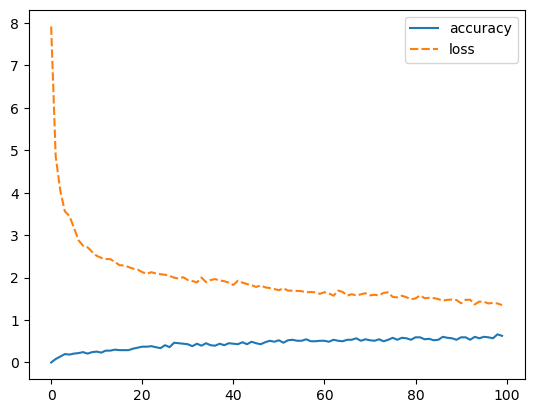

In [24]:
import seaborn as sns
sns.lineplot(model.history.history)


In [25]:
test = "known as structured learning"
test = test.split()
tst = []
for i in test:
    tst.append(a[i])
tst

[12, 6, 13, 1]

In [18]:
pred = model.predict(np.array([tst]))
pred = np.argmax(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
